<a href="https://colab.research.google.com/github/Airinelizabath/Binary-Classifier/blob/main/Binaryclassifier(truck_v_s_car).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 1)

In [33]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [34]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
X_tr=[]
Y_tr=[]
p=X_train.shape[0]
for i in range(p):
  if (y_train[i]==1):
    X_tr.append(X_train[i])
    Y_tr.append(0)
  if (y_train[i]==9):
    X_tr.append(X_train[i])
    Y_tr.append(1)

X_tr=np.array(X_tr)
Y_tr=np.array(Y_tr)


In [36]:
Y_tr[0]

1

In [37]:
y_test = y_test.reshape(-1,)

In [38]:
y_test.shape

(10000,)

In [39]:
X_te=[]
Y_te=[]
p=X_test.shape[0]
for i in range(p):
  if (y_test[i]==1):
    X_te.append(X_test[i])
    Y_te.append(0)
  if (y_test[i]==9):
    X_te.append(X_test[i])
    Y_te.append(1)

X_te=np.array(X_te)
Y_te=np.array(Y_te)

In [40]:
Y_te[:20]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [41]:
classes = ["car","truck"]

In [42]:
Y_tr[:100]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [43]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

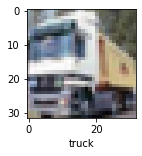

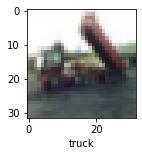

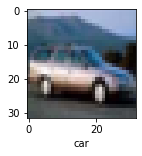

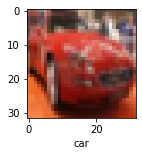

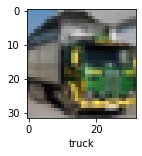

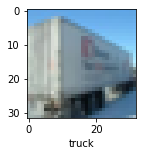

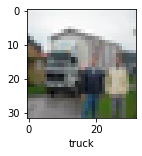

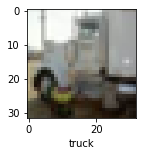

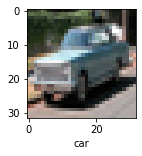

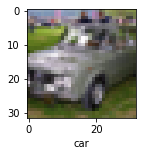

In [45]:
for i in range(10):
  plot_sample(X_tr, Y_tr, i)

In [46]:
X_tr=X_tr/255
X_te=X_te/255

In [47]:
cnn=models.Sequential([
                       #cnn
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),
                       
                      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),


                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
cnn.fit(X_tr,Y_tr,epochs=15)

Epoch 1/15
313/313 [==============================] - 9s 29ms/step - loss: 0.5973 - accuracy: 0.6831
Epoch 2/15
313/313 [==============================] - 9s 29ms/step - loss: 0.4465 - accuracy: 0.8007
Epoch 3/15
313/313 [==============================] - 9s 29ms/step - loss: 0.3721 - accuracy: 0.8384
Epoch 4/15
313/313 [==============================] - 9s 28ms/step - loss: 0.3162 - accuracy: 0.8696
Epoch 5/15
313/313 [==============================] - 9s 29ms/step - loss: 0.2784 - accuracy: 0.8835
Epoch 6/15
313/313 [==============================] - 9s 28ms/step - loss: 0.2429 - accuracy: 0.9030
Epoch 7/15
313/313 [==============================] - 9s 28ms/step - loss: 0.2222 - accuracy: 0.9114
Epoch 8/15
313/313 [==============================] - 9s 28ms/step - loss: 0.1971 - accuracy: 0.9226
Epoch 9/15
313/313 [==============================] - 9s 28ms/step - loss: 0.1765 - accuracy: 0.9299
Epoch 10/15
313/313 [==============================] - 9s 28ms/step - loss: 0.1490 - accura

In [22]:
cnn.evaluate(X_te,Y_te)

63/63 [==============================] - 1s 10ms/step - loss: 0.3757 - accuracy: 0.8915


[0.3757126033306122, 0.8914999961853027]

In [23]:
y_pred = cnn.predict(X_te)
y_pred[:5]

array([[9.9990284e-01, 9.7139957e-05, 3.6478529e-10, 5.3593840e-10,
        1.1889581e-10, 6.2319136e-11, 8.0209762e-11, 4.4875345e-10,
        1.0950110e-09, 1.4342941e-10],
       [9.9995279e-01, 4.7163481e-05, 1.0640542e-08, 1.9540666e-08,
        8.6352694e-09, 3.1613610e-09, 1.2257307e-08, 3.0090138e-08,
        3.9259611e-08, 5.3098774e-09],
       [2.4541936e-05, 9.9997544e-01, 5.5000604e-09, 1.6363487e-09,
        6.4859196e-10, 3.7325296e-10, 3.2705771e-09, 1.2457377e-09,
        6.3734924e-09, 6.9612067e-09],
       [5.3377327e-04, 9.9946624e-01, 4.0196571e-09, 1.4713779e-09,
        7.5853246e-10, 2.9790290e-10, 7.9258849e-10, 1.6753771e-09,
        6.0179448e-09, 3.2669920e-09],
       [6.4808695e-04, 9.9935192e-01, 3.3668104e-09, 1.1584255e-09,
        5.4133931e-10, 2.2606918e-10, 2.2477726e-09, 1.6279962e-09,
        3.0561338e-09, 3.4682490e-09]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 1, 1, 1]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_te)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_te, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1000
           1       0.90      0.88      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [26]:
cnn.save('/content/drive/MyDrive/Colab Notebooks/BINARY')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/BINARY/assets
